In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read csv file

In [2]:
df=pd.read_csv('Stress-Lysis.csv')

# EDA

In [3]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [5]:
((df['Stress Level'].value_counts())/len(df))*100

Stress Level
1    39.480260
2    35.482259
0    25.037481
Name: count, dtype: float64

In [6]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


# Charting

<Axes: >

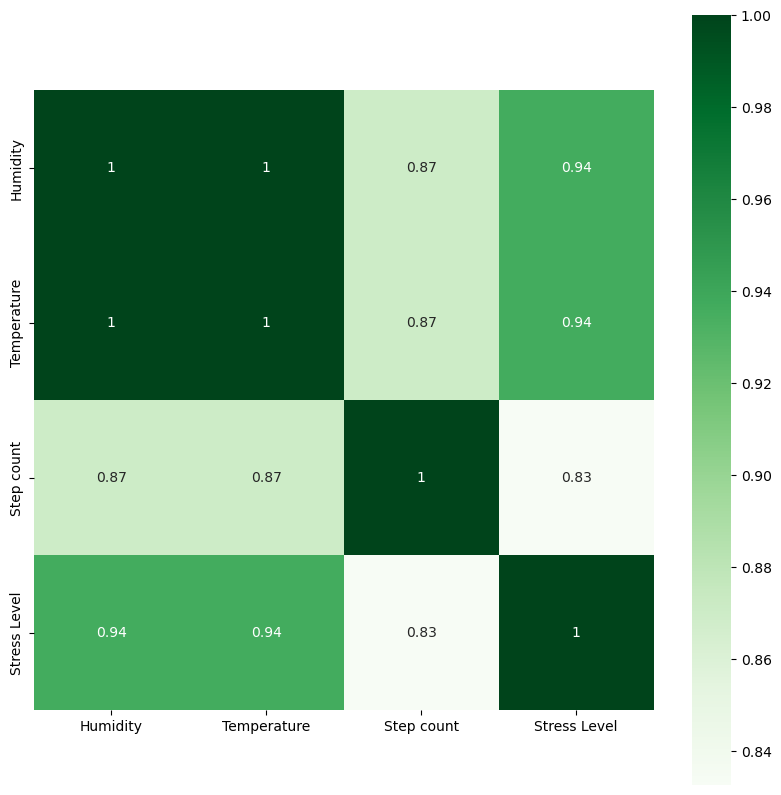

In [7]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Greens',square=True)

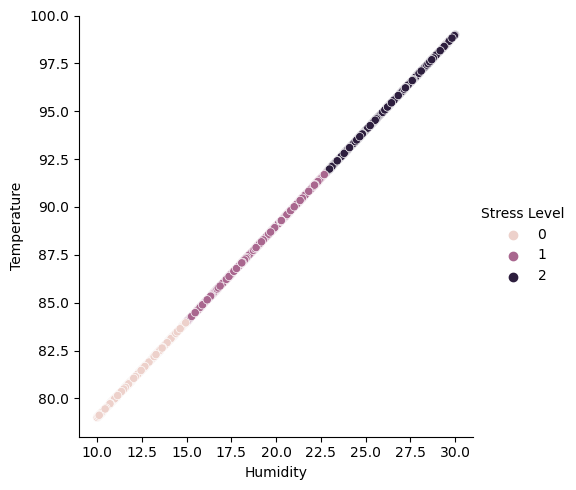

In [24]:
sns.relplot(x=df['Humidity'],y=df['Temperature'],hue=df['Stress Level'])

from sklearn.preprocessing import StandardScaler
x=df[['Humidity','Temperature']]
y=df['Stress Level'].values.reshape(-1,1)
scaler=StandardScaler()
x=scaler.fit_transform(x)

# model_selection

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
trax,tesx,tray,tesy=train_test_split(x,y,test_size=.3,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)

In [13]:
Tpar={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_depth':[2,4,8,16,None]}
treeGR=GridSearchCV(estimator=tree,param_grid=Tpar,scoring='accuracy',n_jobs=-1,cv=5)
treeGR.fit(trax,tray)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [14]:
print(f'best score: {treeGR.best_score_}')
print(f'best parametr: {treeGR.best_params_}')

best score: 0.9985714285714286
best parametr: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


# ensemble

In [15]:
from sklearn.ensemble import AdaBoostClassifier
Apar={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'learning_rate':[1,.1,.01]}
ada=AdaBoostClassifier()
adaGR=GridSearchCV(estimator=ada,param_grid=Apar,scoring='accuracy',n_jobs=-1,cv=5)
adaGR.fit(trax,tray)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [16]:
print(f'best score: {adaGR.best_score_}')
print(f'best parametr: {adaGR.best_params_}')

best score: 0.9985714285714286
best parametr: {'learning_rate': 1, 'n_estimators': 10}


In [17]:
adac=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion= 'gini', max_depth= 2, splitter= 'best'),learning_rate= 1, n_estimators= 10)
model=adac.fit(trax,tray)

In [18]:
score=cross_val_score(model,trax,tray,cv=5,scoring='accuracy')
print(f'mean: val_score:{score.mean()}')

mean: val_score:0.9985714285714286


# evalation

In [19]:
from sklearn.metrics import cohen_kappa_score,accuracy_score
yhat=model.predict(tesx)
model.predict(np.array([21.33,91.33]).reshape(1, -1))
print(yhat)
print(f' accuracy : {accuracy_score(tesy,yhat)}')
print(f'kappa_score : {cohen_kappa_score(tesy,yhat)}')

[0 1 1 1 0 2 1 1 2 1 1 0 2 1 2 1 0 2 1 1 2 1 1 0 0 0 0 0 2 2 1 0 2 1 2 0 2
 0 0 0 0 1 1 1 2 2 1 1 2 0 1 2 1 1 1 2 0 1 1 2 2 1 2 1 1 0 1 0 1 0 2 2 0 1
 2 0 0 2 2 0 2 2 2 2 0 2 0 2 2 2 1 1 0 0 1 0 2 2 0 1 1 2 2 1 2 2 1 0 2 1 0
 0 2 2 0 1 2 2 1 1 2 1 1 1 1 0 2 1 1 1 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 1 2 0
 1 1 2 1 2 0 1 2 0 0 2 1 1 0 1 1 2 1 2 2 0 1 1 0 2 1 0 2 1 2 1 1 1 0 1 2 1
 0 0 0 1 1 0 2 2 1 1 2 1 2 2 0 0 2 2 1 1 1 1 1 0 2 0 1 2 1 0 1 1 1 1 1 0 1
 2 1 0 0 1 1 2 1 1 2 0 2 2 2 2 1 1 0 2 0 1 1 0 1 2 2 2 2 1 2 0 1 1 1 2 1 1
 1 1 1 2 2 2 1 1 2 0 2 1 1 1 0 2 1 2 2 0 0 1 2 0 0 2 2 0 1 2 1 1 1 2 0 0 2
 2 2 0 1 2 2 0 2 0 2 0 0 1 1 1 1 0 1 0 0 1 2 1 2 1 2 1 1 1 1 0 2 2 1 1 1 2
 2 0 0 2 2 2 0 1 1 0 1 1 2 2 2 2 1 0 1 1 2 1 0 2 1 2 1 2 2 1 0 1 2 0 1 1 1
 1 2 0 2 1 2 2 2 1 2 2 2 2 2 2 1 1 2 1 1 1 2 0 1 0 1 1 0 1 0 2 2 0 0 2 0 1
 2 2 0 2 0 0 1 1 2 2 2 2 1 2 1 2 1 2 2 0 2 1 1 0 2 1 2 1 2 1 0 0 1 1 2 2 1
 1 2 2 1 0 2 2 1 2 0 1 0 2 0 0 2 1 0 0 1 0 1 2 0 1 0 1 2 1 0 1 0 2 0 2 2 0
 2 1 1 0 2 0 0 0 1 1 0 0 

In [20]:
import pickle

# Assuming you have already trained your model and named it 'adac'
# Save the model to a file
with open('stress-level-prediction.pkl', 'wb') as file:
    pickle.dump(model, file)

In [21]:
model.predict(np.array([21.33,91.33]).reshape(1,-1))[0]

2

In [22]:
import numpy as np
np.array([21.33,91.33]).reshape(1,-1)

array([[21.33, 91.33]])